   # Project: CandyHierarchy2017 _Data Analysis





- Dataset Description
- important Libraries and Data
- Data preperation
  - Missing data
  - inconsistent data
- Data Visualization
- Conclusion 

## Dataset Description:


https://drive.google.com/drive/u/0/folders/1THFVmmCrMP87eutjbIrSXJCTJLsR9-DS

### - i will go through candy data 2017 , this data has :

- **Internal_ID**


- **Q1-Going Out?**: Are you actually going trick or treating yourself? "has values **Yes or No**"


- **Q2-Gender**: It has four different options, **Femal** ,**Male** ,**Other** ,**I'd rather not say**


- **Q3-Age**: Numerical field


- **Q4-Country**: Text Field, but users have written their own version of the names.  


- **Q5-State/Province**: Text Field, but users have written their own version of the names. Same as the country data.


- **Q6-Joy Or Despair**: All kinds of chocolate bars are the questions with three distinct options to choose from (Joy, Meh, Despair).


- **Q7-Joy Other**: Text Field to write items not included above that give you JOY. 


- **Q8-Despair Other**: Text Field ti write items not included above that give you DESPAIR. 


- **Q9-Other Comments**: Text Field. 


- **Q10-Dress**: Binary field.


- **Q11-Day**: Binary Answer Field. 

## Important Libraries and Data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)


np.random.seed(0)
%matplotlib inline

In [2]:
 df=pd.read_excel("candydata.xlsx")

C:\Users\menat\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [3]:
df.shape

(2460, 120)

It seems that we have 2460 rows and 120 colomns

In [4]:
df.head(10)

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"
5,90272852,No,Male,NaN,NaN,NaN,JOY,DESPAIR,JOY,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,"(75, 23)"
6,90272853,No,Male,53,usa,Colorado,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,90272854,No,Male,33,canada,ontario,JOY,DESPAIR,JOY,DESPAIR,...,when the little kids get the big chocolate bar...,"first person to give out cans of beer, wins",Blue and black,NaN,Friday,NaN,1.0,NaN,NaN,"(55, 5)"
8,90272858,No,Male,40,Canada,Ontario,JOY,DESPAIR,JOY,MEH,...,NaN,NaN,Blue and black,NaN,Sunday,NaN,1.0,NaN,NaN,"(76, 24)"
9,90272859,No,Female,53,Us,Wa,MEH,DESPAIR,JOY,MEH,...,NaN,NaN,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(70, 28)"


 some of the variables got missing values indicated by 'NaN'. 
 But this is not reliable and we need a summary statistics.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Columns: 120 entries, Internal ID to Click Coordinates (x, y)
dtypes: float64(4), int64(1), object(115)
memory usage: 2.3+ MB


The list of variables indicates that all variables are numeric and few of these got missing values.

In [6]:
df.duplicated().sum()

0

There is no duplicated values

## Missing Values

In [7]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

Internal ID                                                                                 0
Q1: GOING OUT?                                                                            110
Q2: GENDER                                                                                 41
Q3: AGE                                                                                    84
Q4: COUNTRY                                                                                64
Q5: STATE, PROVINCE, COUNTY, ETC                                                          100
Q6 | 100 Grand Bar                                                                        747
Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)    734
Q6 | Any full-sized candy bar                                                             672
Q6 | Black Jacks                                                                          958
dtype: int64

That seems like a lot! It might be helpful to see what percentage of the values in our dataset were missing to give us a better sense of the scale of this problem

In [8]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

32.72086720867209


Wow, almost a third of the cells in this dataset are empty! 

In [9]:
# look at the # of missing points in the first ten columns
missing_values_count[0:10]

Internal ID                                                                                 0
Q1: GOING OUT?                                                                            110
Q2: GENDER                                                                                 41
Q3: AGE                                                                                    84
Q4: COUNTRY                                                                                64
Q5: STATE, PROVINCE, COUNTY, ETC                                                          100
Q6 | 100 Grand Bar                                                                        747
Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)    734
Q6 | Any full-sized candy bar                                                             672
Q6 | Black Jacks                                                                          958
dtype: int64

It seems that every row in our dataset had at least one missing value. so We can't drop all NaN values .

In [10]:
# remove all columns with at least one missing value
columns_with_na_dropped = df.dropna(axis=1)
columns_with_na_dropped.head()

,Internal ID
0,90258773
1,90272821
2,90272829
3,90272840
4,90272841


As expected that way destroy our data so I will use the Panda's fillna() function to fill in missing values in my dataframe instead

In [11]:
# replace all NA's the value that comes directly after it in the same column, 
# then replace all the remaining na's with 0
df=df.fillna(method='bfill', axis=0).fillna(0)
df.head()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,when the little kids get the big chocolate bar...,Bottom line is Twix is really the only candy w...,White and gold,dress (https://survey.ubc.ca/media/assets/user...,Sunday,1.0,1.0,1.0,1.0,"(84, 25)"
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,when the little kids get the big chocolate bar...,Bottom line is Twix is really the only candy w...,White and gold,dress (https://survey.ubc.ca/media/assets/user...,Sunday,1.0,1.0,1.0,1.0,"(84, 25)"
2,90272829,No,Male,49,USA,Virginia,MEH,DESPAIR,JOY,MEH,...,when the little kids get the big chocolate bar...,Raisins can go to hell,White and gold,dress (https://survey.ubc.ca/media/assets/user...,Sunday,1.0,1.0,1.0,1.0,"(75, 23)"
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,when the little kids get the big chocolate bar...,Raisins can go to hell,White and gold,dress (https://survey.ubc.ca/media/assets/user...,Sunday,1.0,1.0,1.0,1.0,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,when the little kids get the big chocolate bar...,"first person to give out cans of beer, wins",White and gold,dress (https://survey.ubc.ca/media/assets/user...,Friday,1.0,1.0,1.0,1.0,"(70, 10)"


In [12]:
df=df.fillna(0)
df.head()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,when the little kids get the big chocolate bar...,Bottom line is Twix is really the only candy w...,White and gold,dress (https://survey.ubc.ca/media/assets/user...,Sunday,1.0,1.0,1.0,1.0,"(84, 25)"
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,when the little kids get the big chocolate bar...,Bottom line is Twix is really the only candy w...,White and gold,dress (https://survey.ubc.ca/media/assets/user...,Sunday,1.0,1.0,1.0,1.0,"(84, 25)"
2,90272829,No,Male,49,USA,Virginia,MEH,DESPAIR,JOY,MEH,...,when the little kids get the big chocolate bar...,Raisins can go to hell,White and gold,dress (https://survey.ubc.ca/media/assets/user...,Sunday,1.0,1.0,1.0,1.0,"(75, 23)"
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,when the little kids get the big chocolate bar...,Raisins can go to hell,White and gold,dress (https://survey.ubc.ca/media/assets/user...,Sunday,1.0,1.0,1.0,1.0,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,when the little kids get the big chocolate bar...,"first person to give out cans of beer, wins",White and gold,dress (https://survey.ubc.ca/media/assets/user...,Friday,1.0,1.0,1.0,1.0,"(70, 10)"


In [13]:
df.isna()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
df.isna().sum()

Internal ID                 0
Q1: GOING OUT?              0
Q2: GENDER                  0
Q3: AGE                     0
Q4: COUNTRY                 0
                           ..
Q12: MEDIA [Daily Dish]     0
Q12: MEDIA [Science]        0
Q12: MEDIA [ESPN]           0
Q12: MEDIA [Yahoo]          0
Click Coordinates (x, y)    0
Length: 120, dtype: int64

Now, There is no more missing values 🎉.

## Inconsistent data

In [15]:
df.rename(columns = {df.columns[5]:'COUNTRY'}, inplace = True) 

In [16]:
# get all the unique values in the 'Country' column
countries = df['COUNTRY'].unique()

countries


array(['NM', 'Virginia', 'or', 'exton pa', 'Colorado ', 'ontario',
       'Ontario', 'Wa', 'Quebec', 'NY', 'California', 'Texas', 'NEW YORK',
       'CO', 'IN', 'MN', 'aberdeenshire', 'Alberta', 'Wisconsin, 53705',
       'RI', 'NC', 'Scotland', 'minnesota', 'Michigan', 'Florida',
       'New Jersey', 'VA', 'Colorado', 'Los Angeles, California', 'CA',
       'New York ', 'Chicago, Illinois', 'Nj', 'Wisconsin', 'Minnesota ',
       'London', 'mn', 'TEXAS', 'Illinois', 'District of Columbia',
       'Washington', 'Massachusetts ', 'OR', 'Montana', 'New York',
       'massachusetts', 'Abu Dhabi', 'TX', 'Arizona', 'Dc', 'yukon',
       'Pennsylvania ', 'MD', 'Ohio', 'Alberta ', 'OXFORDSHIRE', 'DC',
       'Iowa', 'Mn', 'TN', 'BC', 'Maryland', 'MI', 'Wisconsin ', 'alaska',
       'Ny', 'Colorado, Jefferson county ', 'Louisiana', 'pa',
       'CO, Larimer County', 'Nebraska ', 'Oregon', 'UT', 'ny',
       'Pennsylvania', 'CDMX', 'north carolina', 'Tennessee ', 'Texas ',
       'Knox county, 

Just looking at this, I can see some problems due to inconsistent data entry.

In [17]:
# convert to lower case
df['COUNTRY'] = df['COUNTRY'].str.lower()
# remove trailing white spaces
df['COUNTRY']= df['COUNTRY'].str.strip()

In [18]:
# get all the unique values in the 'Country' column
countries = df['COUNTRY'].unique()

countries

array(['nm', 'virginia', 'or', 'exton pa', 'colorado', 'ontario', 'wa',
       'quebec', 'ny', 'california', 'texas', 'new york', 'co', 'in',
       'mn', 'aberdeenshire', 'alberta', 'wisconsin, 53705', 'ri', 'nc',
       'scotland', 'minnesota', 'michigan', 'florida', 'new jersey', 'va',
       'los angeles, california', 'ca', 'chicago, illinois', 'nj',
       'wisconsin', 'london', 'illinois', 'district of columbia',
       'washington', 'massachusetts', 'montana', 'abu dhabi', 'tx',
       'arizona', 'dc', 'yukon', 'pennsylvania', 'md', 'ohio',
       'oxfordshire', 'iowa', 'tn', 'bc', 'maryland', 'mi', 'alaska',
       'colorado, jefferson county', 'louisiana', 'pa',
       'co, larimer county', 'nebraska', 'oregon', 'ut', 'cdmx',
       'north carolina', 'tennessee', 'knox county, tennessee',
       'new mexico', 'maine', 'virginia, arlington', 'mo', 'ma',
       'new york, ny', 'il', 'new hampshire', 'georgia',
       'washington, clark', 'ne', 'oklahoma', 'sc', 'nevada',
       

## Data Visualization

### Q2: GENDER

<AxesSubplot:>

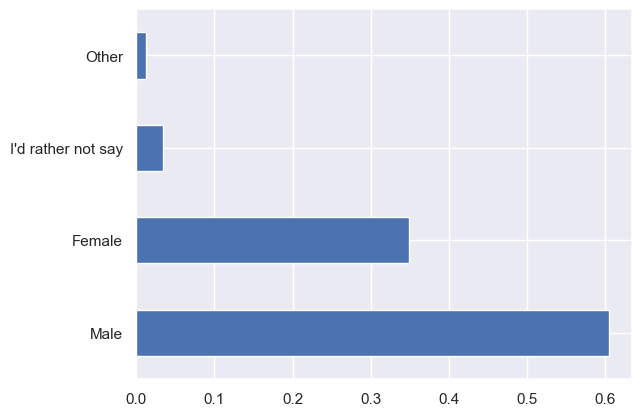

In [19]:
df['Q2: GENDER'].value_counts(normalize=True).plot(kind='barh')

There is more males in our data

### Q3: AGE

In [20]:
df['Q3: AGE'].describe()

count     2460
unique     106
top         40
freq        95
Name: Q3: AGE, dtype: int64

In [21]:
df['Q3: AGE'].unique()

array([44, 49, 40, 23, 53, 33, 43, 56, 64, 37, 59, 48, 54, 36, 45, 25, 34,
       35, 38, 58, 50, 47, 16, 52, 63, 65, 41, 27, 31, 61, 46, 42, 62, 29,
       39, 32, 28, 69, 67, 30, 22, 26, 51, 70, 24, 18, 19, 'Old enough',
       57, 60, 66, 12, 'Many', 55, 72, '?', 21, 11, 'no', 9, 68, 20, 6,
       10, 71, 90, 13, '45-55', 312, 99, 7, 'hahahahaha', 88, 39.4, 74,
       102, 'older than dirt', 17, 15, 8, 75, '5u', 'Enough',
       'See question 2', '24-50', 14, 'Over 50', 100, 76, 1000,
       'sixty-nine', '46 Halloweens.', 'ancient', 77, 'OLD', 'old', 73,
       70.5, 1, 'MY NAME JEFF', 4, '59 on the day after Halloween',
       'old enough', 'your mom',
       'I can remember when Java was a cool new language', '60+'],
      dtype=object)

In [22]:
df['Q3: AGE']=pd.to_numeric(df['Q3: AGE'],errors='coerce')
df['Q3: AGE'].unique()

array([  44. ,   49. ,   40. ,   23. ,   53. ,   33. ,   43. ,   56. ,
         64. ,   37. ,   59. ,   48. ,   54. ,   36. ,   45. ,   25. ,
         34. ,   35. ,   38. ,   58. ,   50. ,   47. ,   16. ,   52. ,
         63. ,   65. ,   41. ,   27. ,   31. ,   61. ,   46. ,   42. ,
         62. ,   29. ,   39. ,   32. ,   28. ,   69. ,   67. ,   30. ,
         22. ,   26. ,   51. ,   70. ,   24. ,   18. ,   19. ,    nan,
         57. ,   60. ,   66. ,   12. ,   55. ,   72. ,   21. ,   11. ,
          9. ,   68. ,   20. ,    6. ,   10. ,   71. ,   90. ,   13. ,
        312. ,   99. ,    7. ,   88. ,   39.4,   74. ,  102. ,   17. ,
         15. ,    8. ,   75. ,   14. ,  100. ,   76. , 1000. ,   77. ,
         73. ,   70.5,    1. ,    4. ])

In [23]:
df=df.fillna(0)
df.head()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,COUNTRY,Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,No,Male,44.0,USA,nm,MEH,DESPAIR,JOY,MEH,...,when the little kids get the big chocolate bar...,Bottom line is Twix is really the only candy w...,White and gold,dress (https://survey.ubc.ca/media/assets/user...,Sunday,1.0,1.0,1.0,1.0,"(84, 25)"
1,90272821,No,Male,44.0,USA,nm,MEH,DESPAIR,JOY,MEH,...,when the little kids get the big chocolate bar...,Bottom line is Twix is really the only candy w...,White and gold,dress (https://survey.ubc.ca/media/assets/user...,Sunday,1.0,1.0,1.0,1.0,"(84, 25)"
2,90272829,No,Male,49.0,USA,virginia,MEH,DESPAIR,JOY,MEH,...,when the little kids get the big chocolate bar...,Raisins can go to hell,White and gold,dress (https://survey.ubc.ca/media/assets/user...,Sunday,1.0,1.0,1.0,1.0,"(75, 23)"
3,90272840,No,Male,40.0,us,or,MEH,DESPAIR,JOY,MEH,...,when the little kids get the big chocolate bar...,Raisins can go to hell,White and gold,dress (https://survey.ubc.ca/media/assets/user...,Sunday,1.0,1.0,1.0,1.0,"(75, 23)"
4,90272841,No,Male,23.0,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,when the little kids get the big chocolate bar...,"first person to give out cans of beer, wins",White and gold,dress (https://survey.ubc.ca/media/assets/user...,Friday,1.0,1.0,1.0,1.0,"(70, 10)"


C:\Users\menat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Q3: AGE', ylabel='Density'>

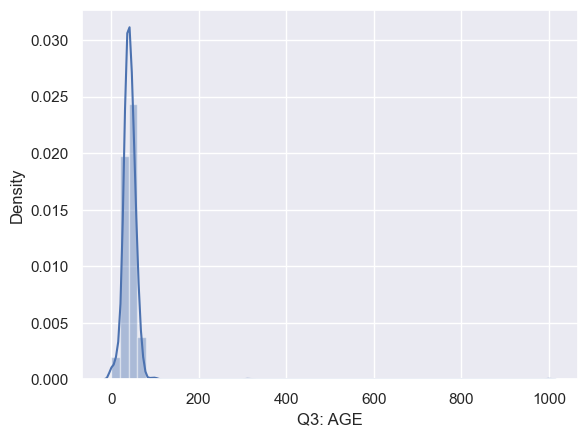

In [24]:
sns.distplot(df['Q3: AGE'])

In [25]:
df.loc[df['Q3: AGE']>80, 'Q3: AGE']=80
df.loc[df['Q3: AGE']<18, 'Q3: AGE']=18

C:\Users\menat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Q3: AGE', ylabel='Density'>

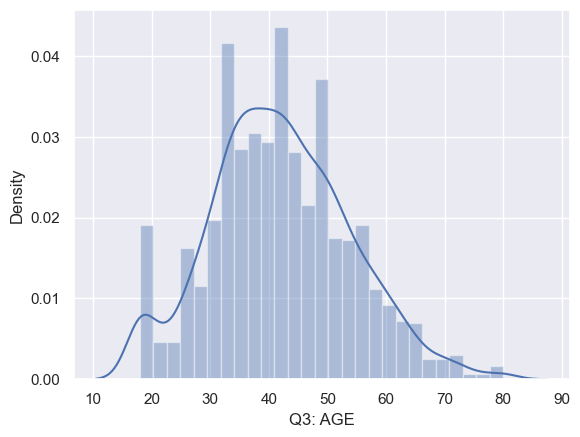

In [26]:
sns.distplot(df['Q3: AGE'])

It appers that the most people are between 30 and 60 years old.

In [27]:
df['Q3: AGE'].describe()

count    2460.000000
mean       42.028821
std        11.874187
min        18.000000
25%        34.000000
50%        41.000000
75%        50.000000
max        80.000000
Name: Q3: AGE, dtype: float64

### Q1: GOING OUT?

In [28]:
df['Q1: GOING OUT?'].unique()

array(['No', 'Yes'], dtype=object)

<AxesSubplot:xlabel='Q1: GOING OUT?', ylabel='count'>

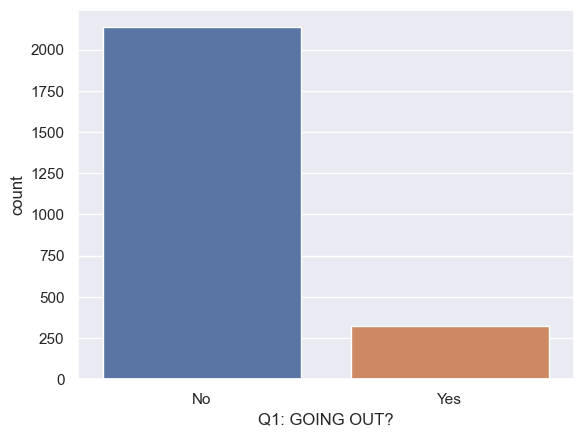

In [29]:
sns.countplot(x='Q1: GOING OUT?', data=df)

C:\Users\menat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


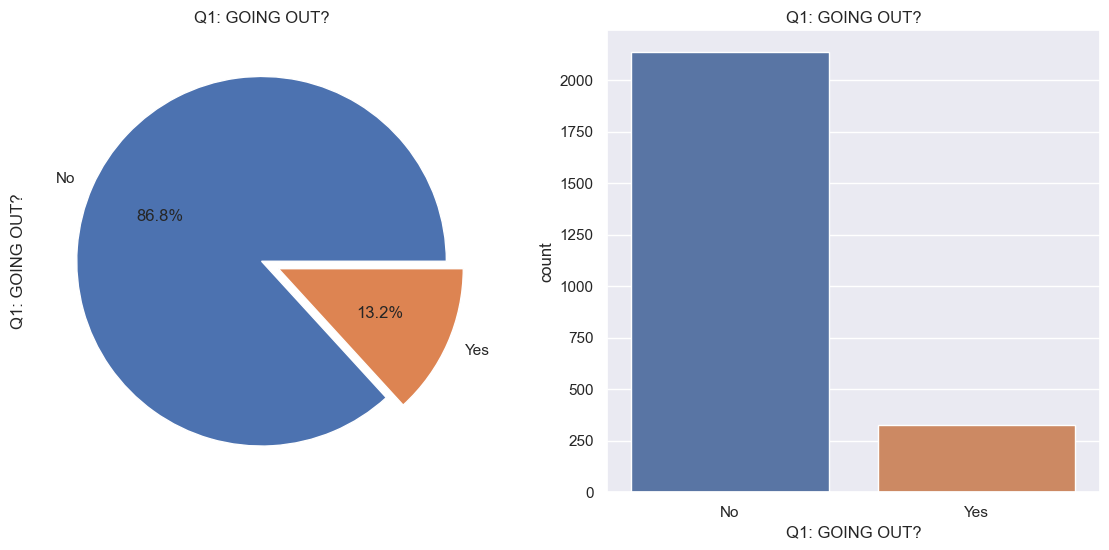

In [30]:
f,ax=plt.subplots(1,2,figsize=(14,6))
df['Q1: GOING OUT?'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=False)
ax[0].set_title('Q1: GOING OUT?')
ax[0].set_ylabel('Q1: GOING OUT?')
sns.countplot('Q1: GOING OUT?',data=df,ax=ax[1])
ax[1].set_title('Q1: GOING OUT?')
plt.show()

Absloutly this figs shows that more than people  about 86% said that they trick their selfs

## Q6 | 100 Grand Bar

In [31]:
df['Q6 | 100 Grand Bar'].unique()

array(['MEH', 'JOY', 'DESPAIR'], dtype=object)

<AxesSubplot:xlabel='Q6 | 100 Grand Bar', ylabel='count'>

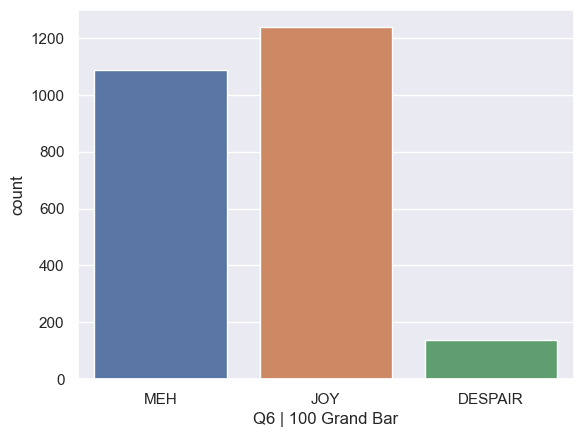

In [32]:
sns.countplot(x='Q6 | 100 Grand Bar', data=df)

 That fig proves that candy gives joy for them.

## Conclusion:

This figers shows that the people who complete the servay who are most percent of them are men , uses candy as a source of joy to comfort them selfs and they recognize that they are tricking themselfs by that way.